### Fractional differentiated features and alternative distance

실수 차분된 가격 계열이 시장의 기억을 보존한다면, 최적의 배분도 다르게 나올까?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from FinancialMachineLearning.features.fracdiff import FractionalDifferentiatedFeatures

In [2]:
import yfinance as yf

start_date = '1999-12-29'
end_date = '2024-03-06'
tickers = [
    'AAPL', 'MSFT', 'GOOGL', 'AMZN', 'PYPL', 'ADBE', 'INTC', 'CSCO', 'CMCSA', 'PEP', 'NFLX', 'COST', 'AMGN', 'AVGO', 'TXN', 'QCOM', 'GILD', 'SBUX'
]
market = yf.download(tickers, start_date, end_date)['Close']

[*********************100%%**********************]  18 of 18 completed


In [6]:
market.dropna(axis = 1, inplace = True)

In [7]:
fracdiff = FractionalDifferentiatedFeatures.fracDiff_FFD(market, 0.6)

In [8]:
fracdiff

,AAPL,ADBE,AMGN,AMZN,CMCSA,COST,CSCO,GILD,INTC,MSFT,PEP,QCOM,SBUX,TXN
2002-05-07,-0.007919,-0.152647,-2.183718,0.012974,-0.047452,0.600989,-0.452950,0.028266,-0.464678,-0.269046,0.364421,-1.876017,0.014112,-0.993385
2002-05-08,0.030203,2.451115,1.023410,0.073680,0.406450,1.591069,2.708020,0.498827,2.343906,2.367308,0.322593,1.058479,0.008223,2.348520
2002-05-09,0.008158,0.194424,-1.823345,0.057764,-0.019384,0.113806,0.303284,0.096768,-0.025797,-0.674927,0.936762,-0.694525,-0.059782,-0.179489
2002-05-10,-0.008617,-0.153396,-2.946542,-0.001488,-0.152686,-0.304378,-0.070746,-0.074229,-1.096146,-1.149908,1.061808,-1.307812,-0.098138,-1.062718
2002-05-13,0.010881,1.142017,0.688140,0.035154,0.239487,-0.160374,0.313734,0.264304,1.125934,0.838771,0.990578,0.311562,0.088631,1.153099
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-02-28,0.488630,1.083281,-1.641357,3.644891,0.280990,22.619651,-0.096850,-0.100025,-0.424581,7.341892,0.186782,2.003707,-0.492946,0.277844
2024-02-29,0.499786,10.717589,-3.593560,7.446834,1.034514,15.711691,0.403525,-0.481988,1.129700,13.131634,-0.774886,5.043540,2.149770,5.576480
2024-03-01,-0.037547,16.821795,5.732319,6.726427,0.571709,22.667402,0.303222,0.149162,1.381236,11.388862,-0.348432,9.251560,-0.561963,6.874923
2024-03-04,-3.779756,6.805242,1.717332,4.730792,-0.428342,28.876841,1.011083,0.073415,2.643223,8.935204,1.165033,9.287951,-0.362855,5.572369


In [11]:
ret = np.log(market / market.shift()).dropna()

In [12]:
ret

,AAPL,ADBE,AMGN,AMZN,CMCSA,COST,CSCO,GILD,INTC,MSFT,PEP,QCOM,SBUX,TXN
Date,,,,,,,,,,,,,,
1999-12-30,-0.003732,0.000947,0.048357,-0.054608,-0.031870,0.004803,0.000589,0.006905,-0.002238,-0.002653,-0.001759,-0.018377,-0.023049,-0.066306
1999-12-31,0.024617,0.018762,-0.077077,-0.037862,-0.007802,-0.000685,0.008790,-0.006905,-0.016567,-0.007467,-0.007067,0.085142,0.005168,-0.028063
2000-01-03,0.085033,-0.025413,0.046756,0.160464,-0.023779,-0.024967,0.008713,0.039621,0.055385,-0.001607,0.045068,0.017936,0.016614,0.062677
2000-01-04,-0.088077,-0.087618,-0.079546,-0.086884,-0.077817,-0.056333,-0.057737,-0.046573,-0.047821,-0.034364,-0.025752,-0.101148,-0.032198,-0.043458
2000-01-05,0.014527,0.019578,0.033830,-0.161039,-0.026356,0.016943,-0.003068,-0.008173,0.008255,0.010489,-0.024649,-0.035325,0.013004,-0.024407
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-02-28,-0.006647,-0.001213,-0.003705,-0.002192,-0.002843,0.004355,-0.005188,-0.004392,-0.017470,0.000589,-0.006742,-0.015598,-0.012077,-0.011586
2024-02-29,-0.003700,0.015215,-0.013169,0.020577,0.016471,-0.005456,0.006430,-0.008287,0.024931,0.014415,-0.010169,0.012371,0.020224,0.025972
2024-03-01,-0.006049,0.018830,0.023460,0.008226,-0.001168,0.007433,0.000620,0.002908,0.017728,0.004487,-0.004546,0.033037,-0.018505,0.021988


#### Visualization

<Axes: >

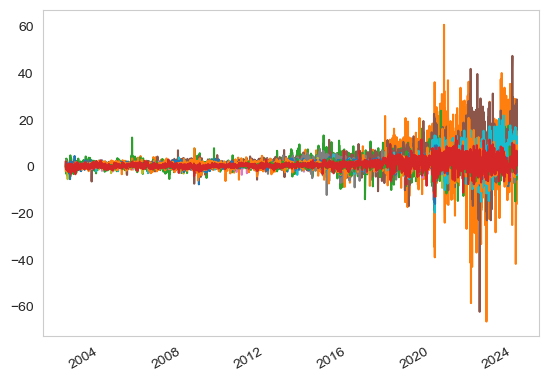

In [14]:
fracdiff.plot(
    grid = False,
    legend = False
)

<Axes: xlabel='Date'>

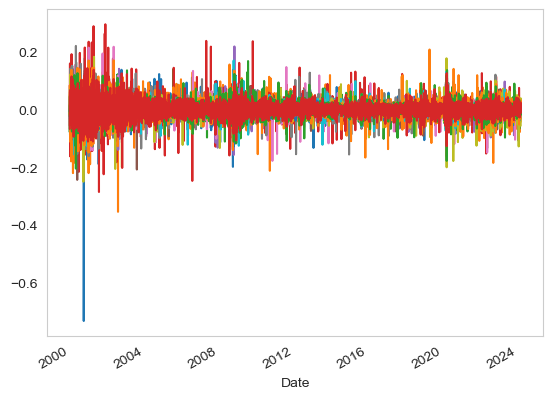

In [15]:
ret.plot(
    grid = False,
    legend = False
)

#### Correlation based distance

In [16]:
from FinancialMachineLearning.metrics.distance import DistanceDataFrame

metric_frac = DistanceDataFrame(fracdiff)
metric_ret = DistanceDataFrame(ret)

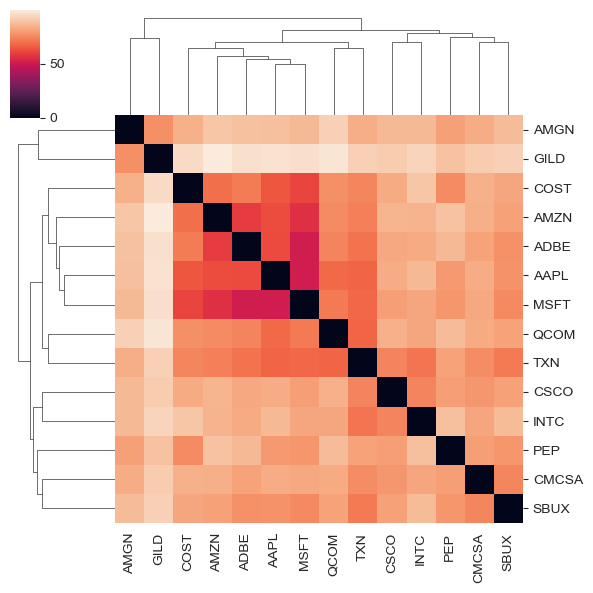

In [24]:
corr_distance_frac = metric_frac.corr_based_distance()

sns.clustermap(
    corr_distance_frac,
    figsize = (6, 6)
)

#### Jensen shannon Divergence

/Users/junghunlee/anaconda3/envs/FinancialMachineLearning/lib/python3.10/site-packages/seaborn/matrix.py:530: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,
/Users/junghunlee/anaconda3/envs/FinancialMachineLearning/lib/python3.10/site-packages/seaborn/matrix.py:530: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,


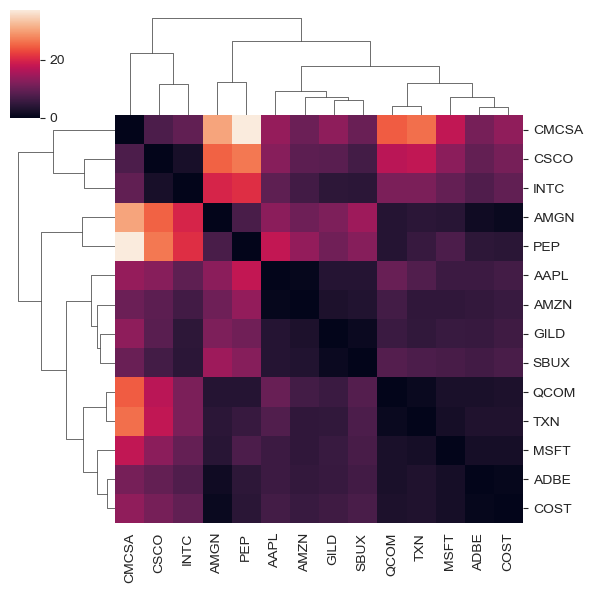

In [25]:
jsd = metric_frac.jensen_shannon_divergence()

sns.clustermap(
    jsd,
    figsize = (6, 6)
)

#### Variational Information

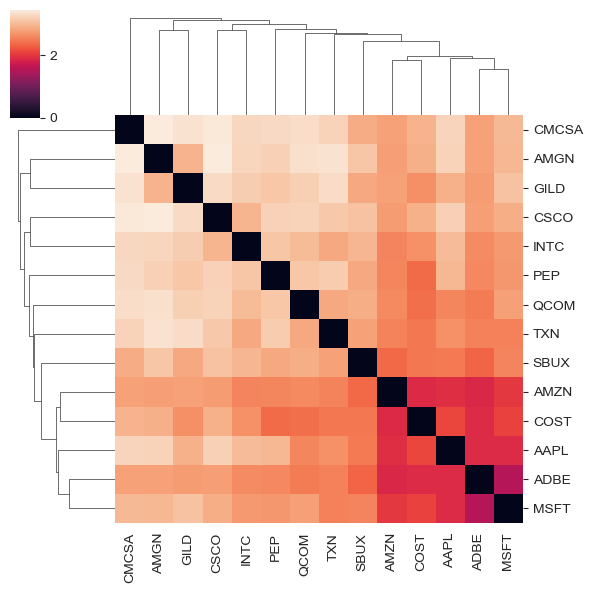

In [26]:
vi = metric_frac.variational_information()

sns.clustermap(
    vi,
    figsize = (6, 6)
)

#### Mutual Information

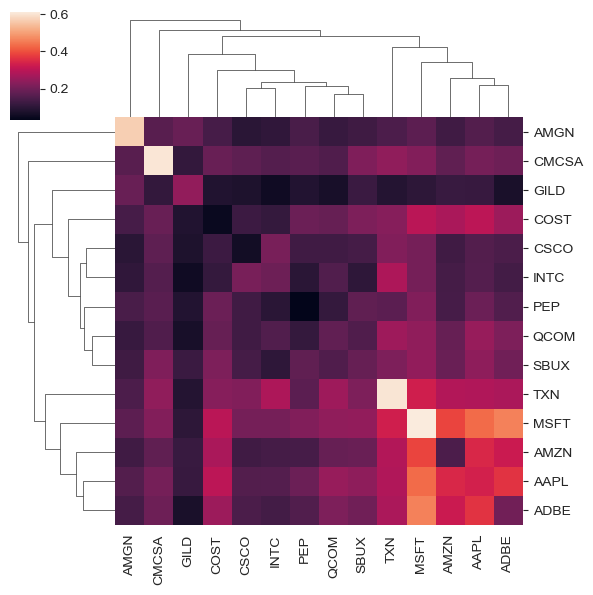

In [27]:
mi = metric_frac.mutual_information()

sns.clustermap(
    mi,
    figsize = (6, 6)
)

#### Optimization

In [28]:
from scipy.optimize import minimize

def markowitz_optimization(returns, distance_matrix, target_return):
    n = distance_matrix.shape[0]
    initial_weights = np.ones(n) / n

    def portfolio_risk(weights):
        weighted_distance = np.dot(weights.T, np.dot(distance_matrix, weights))
        return np.sqrt(weighted_distance)

    def target_return_constraint(weights):
        return target_return - np.dot(weights, returns)

    def weight_sum_constraint(weights):
        return np.sum(weights) - 1

    constraints = [{'type': 'eq', 'fun': weight_sum_constraint},
                   {'type': 'eq', 'fun': target_return_constraint}]

    bounds = tuple((0, 1) for _ in range(n))

    result = minimize(portfolio_risk, initial_weights, method='SLSQP', bounds=bounds, constraints=constraints)
    result = pd.Series(result.x, index = returns.index)

    return result

In [30]:
def generate_random_portfolios(returns, distance_matrix, num_portfolios=5000):
    n = returns.shape[1]  
    mean_returns = returns.mean()  
    portfolio_returns = []
    portfolio_volatility = []
    for _ in range(num_portfolios):
        weights = np.random.random(n)
        weights /= np.sum(weights)
        
        portfolio_return = np.dot(weights, mean_returns)
        portfolio_returns.append(portfolio_return)
        
        portfolio_var = np.dot(weights.T, np.dot(distance_matrix, weights))
        portfolio_std = np.sqrt(portfolio_var)
        portfolio_volatility.append(portfolio_std)

    portfolios = pd.DataFrame({
        'Return': portfolio_returns,
        'Volatility': portfolio_volatility
    })
    
    return portfolios

def find_optimal_portfolio(returns, distance_matrix, risk_free_rate=0.0):
    n = returns.shape[1]
    mean_returns = returns.mean()

    def neg_sharpe_ratio(weights):
        portfolio_return = np.dot(weights, mean_returns)
        portfolio_var = np.dot(weights.T, np.dot(distance_matrix, weights))
        portfolio_std = np.sqrt(portfolio_var)
        sharpe_ratio = (portfolio_return - risk_free_rate) / portfolio_std
        return -sharpe_ratio 

    constraints = ({'type': 'eq', 'fun': lambda weights: np.sum(weights) - 1},)
    bounds = tuple((0, 1) for _ in range(n))
    initial_weights = np.ones(n) / n

    result = minimize(neg_sharpe_ratio, initial_weights, method='SLSQP', bounds=bounds, constraints=constraints)
    
    optimal_weights = result.x
    optimal_weights = pd.Series(optimal_weights, index = returns.columns, name = 'weight')
    optimal_return = np.dot(optimal_weights, mean_returns)
    return optimal_weights, optimal_return

def find_optimal_portfolio_distance_maximization(returns, distance_matrix, risk_free_rate=0.0):
    n = returns.shape[1]
    mean_returns = returns.mean()

    def min_negative_entropy_based_measure(weights):
        diversity_measure = np.dot(weights.T, np.dot(distance_matrix, weights))
        return -diversity_measure

    constraints = ({'type': 'eq', 'fun': lambda weights: np.sum(weights) - 1},)
    bounds = tuple((0, 1) for _ in range(n))
    initial_weights = np.ones(n) / n

    result = minimize(min_negative_entropy_based_measure, initial_weights, method='SLSQP', bounds=bounds, constraints=constraints)
    
    optimal_weights = result.x
    optimal_weights = pd.Series(optimal_weights, index=returns.columns, name='weight')
    
    optimal_diversity_measure = -min_negative_entropy_based_measure(optimal_weights)

    return optimal_weights, optimal_diversity_measure

In [32]:
portfolio_mi = generate_random_portfolios(fracdiff, mi, num_portfolios = 5000)
optimal_weight_mi, optimal_return_mi = find_optimal_portfolio_distance_maximization(fracdiff, mi)

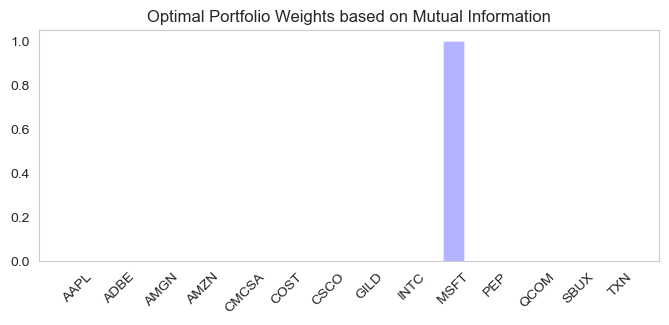

In [33]:
plt.figure(figsize = (8, 3))
plt.bar(
    optimal_weight_mi.index, optimal_weight_mi, color = 'b', alpha = 0.3, label = 'Optimal Portfolio', width = 0.5
)
plt.grid(False)
plt.xticks(rotation = 45)
plt.title('Optimal Portfolio Weights based on Mutual Information')
plt.show()

In [35]:
portfolio_vi = generate_random_portfolios(fracdiff, vi, num_portfolios = 5000)
optimal_weight_vi, optimal_return_vi = find_optimal_portfolio_distance_maximization(fracdiff, vi)

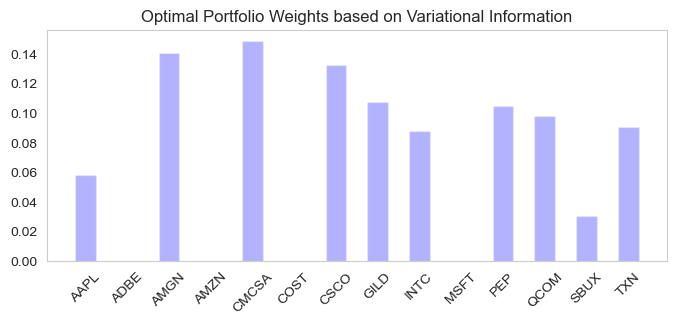

In [36]:
plt.figure(figsize = (8, 3))
plt.bar(
    optimal_weight_vi.index, optimal_weight_vi, color = 'b', alpha = 0.3, label = 'Optimal Portfolio', width = 0.5
)
plt.grid(False)
plt.xticks(rotation = 45)
plt.title('Optimal Portfolio Weights based on Variational Information')
plt.show()

In [37]:
portfolio_jsd = generate_random_portfolios(fracdiff, jsd, num_portfolios = 5000)
optimal_weight_jsd, optimal_return_jsd = find_optimal_portfolio_distance_maximization(fracdiff, jsd)

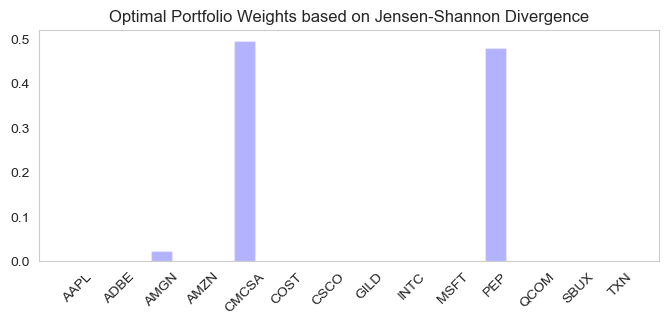

In [38]:
plt.figure(figsize = (8, 3))
plt.bar(
    optimal_weight_jsd.index, optimal_weight_jsd, color = 'b', alpha = 0.3, label = 'Optimal Portfolio', width = 0.5
)
plt.grid(False)
plt.xticks(rotation = 45)
plt.title('Optimal Portfolio Weights based on Jensen-Shannon Divergence')
plt.show()

In [39]:
portfolio_corr = generate_random_portfolios(fracdiff, corr_distance_frac, num_portfolios = 5000)
optimal_weight_corr, optimal_return_corr = find_optimal_portfolio_distance_maximization(fracdiff, corr_distance_frac)

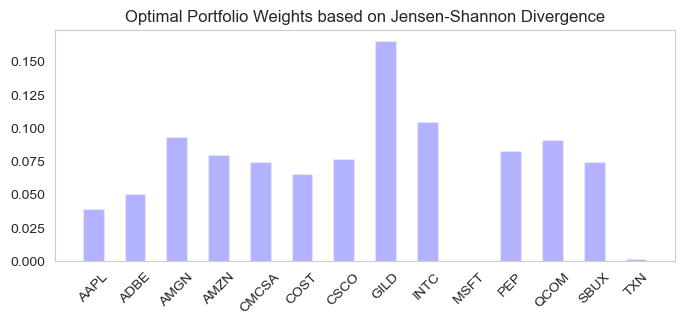

In [40]:
plt.figure(figsize = (8, 3))
plt.bar(
    optimal_weight_corr.index, optimal_weight_corr, color = 'b', alpha = 0.3, label = 'Optimal Portfolio', width = 0.5
)
plt.grid(False)
plt.xticks(rotation = 45)
plt.title('Optimal Portfolio Weights based on Jensen-Shannon Divergence')
plt.show()

In [43]:
import quantstats as qs

In [44]:
backtest = pd.DataFrame()
backtest = pd.concat(
    [
        backtest, 
        (ret * optimal_weight_corr).sum(axis = 1),
        (ret * optimal_weight_jsd).sum(axis = 1),
        (ret * optimal_weight_vi).sum(axis = 1),
        (ret * optimal_weight_mi).sum(axis = 1)
    ], axis = 1
)
backtest.columns = [
    'Correlation Distance', 'Jensen-Shannon Divergence', 'Variational Information', 'Mutual Information'
]

In [45]:
backtest.index = pd.to_datetime(backtest.index)

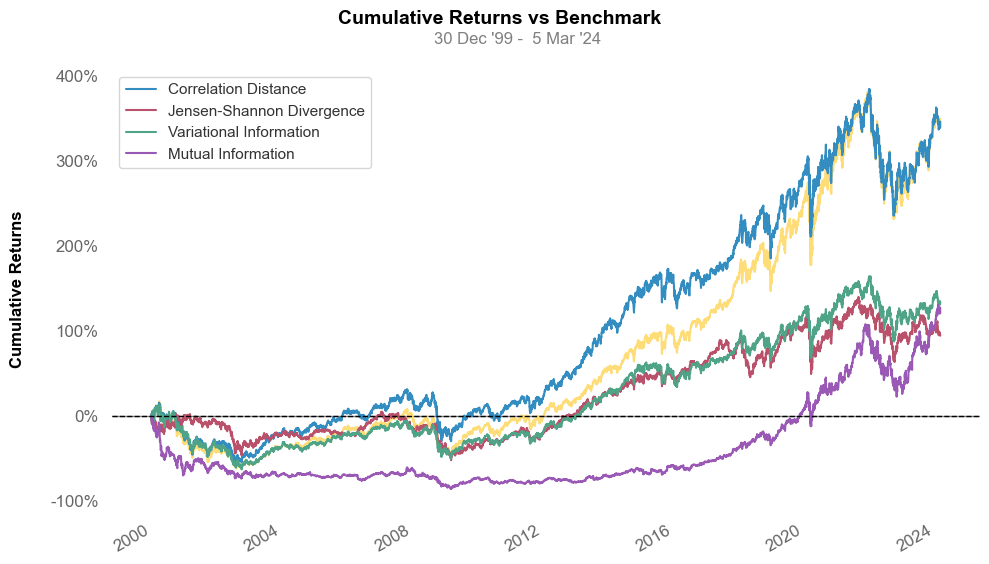

In [47]:
plt.rcParams["axes.grid"] = False  # 모든 플롯에 대해 그리드 비활성화
qs.plots.returns(
    backtest,
    benchmark = ret.mean(axis = 1),
)